In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy import mean
from numpy import std

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
import scikitplot as skplt

In [6]:
df = pd.read_csv('/kaggle/input/customers-to-subscription-through-app-behavior/clean_FineTech_appData.csv')
df.head()

,Unnamed: 0,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [7]:
# df.isnull().sum()

In [8]:
# df.dtypes

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

In [10]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.0

In [11]:
df.groupby('enrolled').mean()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
enrolled,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,186808.183141,3.000318,12.966918,33.325964,17.296421,0.104652,0.189980,0.165646,0.365924,0.289622,0.303777,0.222107,0.312048,0.167753,0.297694,0.321153,0.251292,0.215984,0.080994,0.047157,0.063380,0.110934,0.054314,0.019443,0.036938,0.027276,0.033280,0.044493,0.0,0.041352,0.036382,0.018926,0.036660,0.017177,0.027594,0.019205,0.034553,0.018767,0.114076,0.010338,0.012604,0.018767,0.008946,0.009145,4.783936,0.332406,0.624135,0.162465,0.875984
1,186972.261127,3.059759,12.142575,30.103421,24.941247,0.111026,0.153843,0.164346,0.671429,0.297746,0.748089,0.418149,0.636861,0.148209,0.550141,0.409095,0.431187,0.185352,0.087042,0.050825,0.089859,0.036056,0.048692,0.088692,0.053320,0.034608,0.049658,0.050664,0.0,0.049698,0.045795,0.029980,0.015654,0.030060,0.035976,0.025755,0.024990,0.023581,0.078833,0.018149,0.014085,0.007968,0.007445,0.005996,7.661851,0.398028,1.235050,0.191429,0.699759


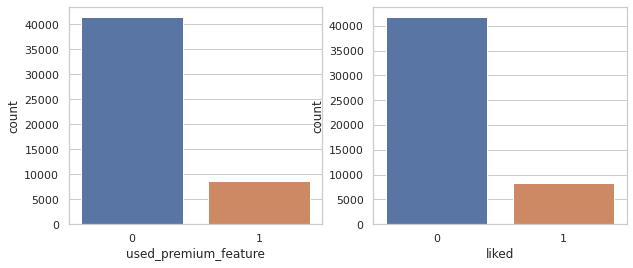

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.countplot('used_premium_feature', data=df, ax=ax1)
sns.countplot('liked', data=df, ax=ax2)
plt.show()

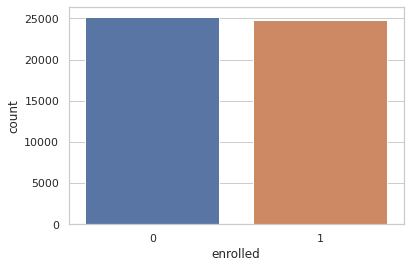

In [13]:
sns.countplot('enrolled', data=df)
plt.show()

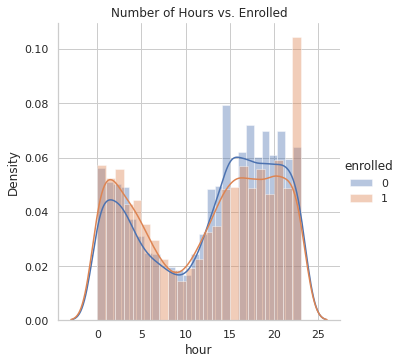

In [14]:
sns.FacetGrid(df, hue='enrolled', height=5).map(sns.distplot,'hour').add_legend().set(title='Number of Hours vs. Enrolled')
plt.show()

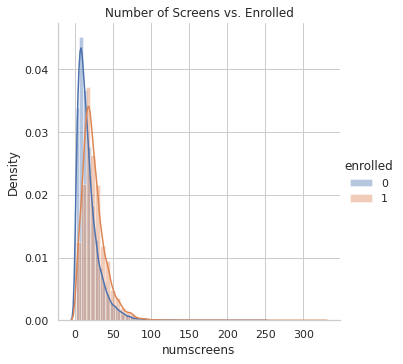

In [15]:
sns.FacetGrid(df, hue='enrolled', height=5).map(sns.distplot,'numscreens').add_legend().set(title='Number of Screens vs. Enrolled')
plt.show()

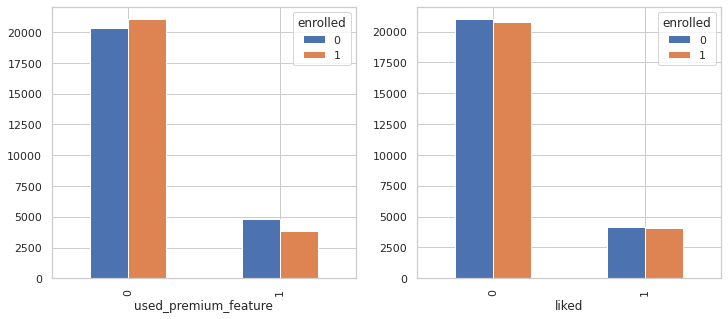

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
pd.crosstab(df.used_premium_feature,df.enrolled).plot(kind='bar', ax=ax1)
pd.crosstab(df.liked,df.enrolled).plot(kind='bar', ax=ax2)
plt.show()

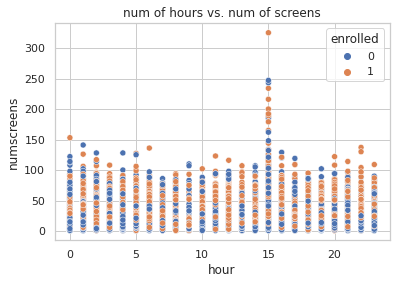

In [17]:
sns.scatterplot(x='hour', y='numscreens', hue='enrolled', data=df)
plt.title('num of hours vs. num of screens')
plt.show()

## `Logistic Regression`

### Check multicollinearity - VIF

In [18]:
# Analyze at all VIF.
X = df.drop(['enrolled'], axis=1)
Cols = range(X.shape[1])

vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in Cols]
vif_df['Variable'] = X.columns
vif_df

,VIF,Variable
0,3.539115,user
1,2.963819,dayofweek
2,3.398465,hour
3,5.747319,age
4,12.868172,numscreens
5,1.170409,minigame
6,1.397994,used_premium_feature
7,1.189023,liked
8,5.336585,location
9,2.207429,Institutions


#### Loop through VIF and drop the highest ones until all has a value less than 5.

In [19]:
while True:
    Cols = range(X.shape[1])
    vif = np.array([variance_inflation_factor(X.values, i) for i in Cols])
    if all(vif < 5):
        break
    else:
        Cols = np.delete(Cols, np.argmax(vif))
        X = X.iloc[:, Cols]

In [20]:
X.shape

(50000, 42)

In [21]:
y = df.enrolled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12)

### Feature Selection

In [22]:
rfe = RFE(estimator=LogisticRegression(), verbose=1)
rfe.fit(X_train, y_train)

# Check the attribute ranking.
X.columns[rfe.support_]

im_rfe = pd.Series(rfe.ranking_, index=X.columns)
im_rfe.sort_values(ascending=False)

Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


EditProfile                22
Institutions               21
liked                      20
ListPicker                 19
ResendToken                18
NetworkFailure             17
ProfileEmploymentLength    16
ProfileJobTitle            15
SecurityModal              14
VerifyIncomeType           13
RewardsContainer           12
Leaderboard                11
RewardDetail               10
Rewards                     9
minigame                    8
TransactionList             7
dayofweek                   6
ProfileMaritalStatus        5
ProfileEducationMajor       4
Login                       3
cc_screens_count            2
AccountView                 1
saving_screens_count        1
credit_screens_count        1
VerifyAnnualIncome          1
WebView                     1
user                        1
VerifyHousingAmount         1
VerifyMobile                1
Alerts                      1
Finances                    1
Splash                      1
idscreen                    1
Cycle     

In [23]:
# Accuracy Score.
accuracy_score(y_test, rfe.predict(X_test))

0.50345

### Selected Dataset

In [24]:
lr_df = df[['EditProfile', 'Institutions', 'liked', 'ListPicker', 'ResendToken', 'NetworkFailure', 
            'ProfileEmploymentLength', 'ProfileJobTitle', 'SecurityModal', 'VerifyIncomeType', 
            'RewardsContainer', 'Leaderboard', 'RewardDetail', 'Rewards', 'enrolled']]
lr_df.head()

,EditProfile,Institutions,liked,ListPicker,ResendToken,NetworkFailure,ProfileEmploymentLength,ProfileJobTitle,SecurityModal,VerifyIncomeType,RewardsContainer,Leaderboard,RewardDetail,Rewards,enrolled
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
X = lr_df.drop(['enrolled'], axis=1)
y = lr_df.enrolled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12)

### Logistic Regression

In [26]:
lr = LogisticRegression().fit(X_train, y_train)

In [27]:
y_pred = lr.predict(X_train)
accuracy_score(y_train, y_pred)

0.5162

In [28]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.51795

In [29]:
lr.score(X_test, y_test)

0.51795

## `Random Forest`

In [30]:
X = df.drop(['enrolled'], axis=1)
y = df.enrolled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12)

In [31]:
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.1, random_state=12)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.1, n_estimators=400, random_state=12)

In [32]:
rf.score(X_train, y_train)

0.7249

In [33]:
rf.score(X_test, y_test)

0.7208

### Feature Selection

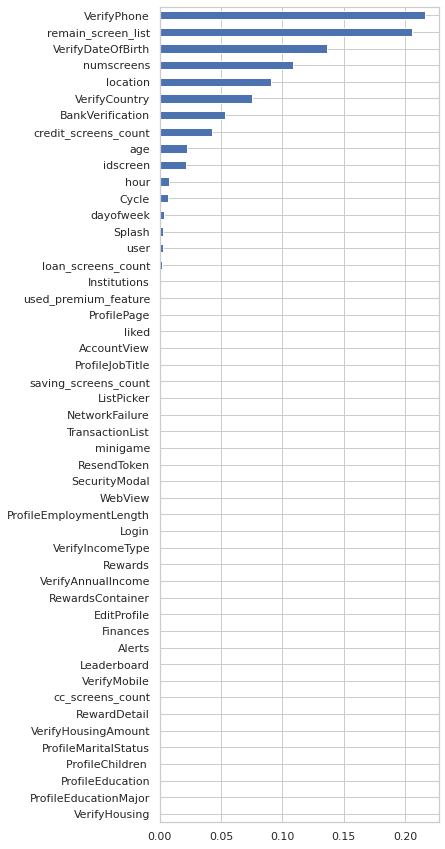

In [34]:
im_rf = pd.Series(rf.feature_importances_, index=X.columns)
sort_im = im_rf.sort_values()

# Plot.
plt.figure(figsize=(5, 15))
sort_im.plot(kind='barh')
plt.show()

### Selected Dataset

In [35]:
sel_df = df[['VerifyPhone', 'remain_screen_list', 'VerifyDateOfBirth', 'numscreens', 'location', 'VerifyCountry', 
             'BankVerification', 'credit_screens_count', 'enrolled']]
sel_df.head()

,VerifyPhone,remain_screen_list,VerifyDateOfBirth,numscreens,location,VerifyCountry,BankVerification,credit_screens_count,enrolled
0,1,7,1,15,0,0,0,0,0
1,1,5,1,13,1,1,0,0,0
2,0,0,0,3,0,0,0,0,0
3,1,6,1,40,1,0,0,3,1
4,1,10,0,32,0,1,1,2,1


In [36]:
X = sel_df.drop('enrolled', axis=1)
y = sel_df.enrolled

In [37]:
X = StandardScaler().fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12)

## `Logistic Regression`

In [39]:
lr = LogisticRegression().fit(X_train, y_train)

In [40]:
lr.score(X_train, y_train)

0.7476

In [41]:
lr.score(X_test, y_test)

0.75495

In [42]:
# Auc Score.
y_pred_proba = lr.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.8114632450150951

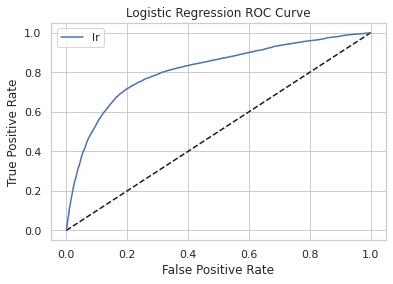

In [43]:
# Roc-Auc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='lr')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
# Confusion Metrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[15254  4884]
 [ 4918 14944]]


In [46]:
# Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     20138
           1       0.75      0.75      0.75     19862

    accuracy                           0.75     40000
   macro avg       0.75      0.75      0.75     40000
weighted avg       0.75      0.75      0.75     40000



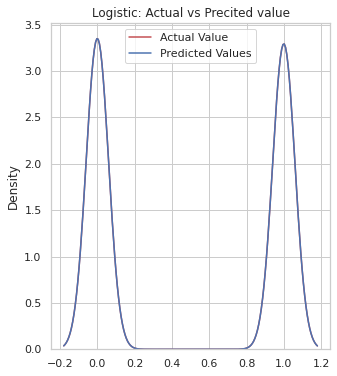

In [47]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_pred, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Logistic: Actual vs Precited value')
plt.legend()
plt.show()

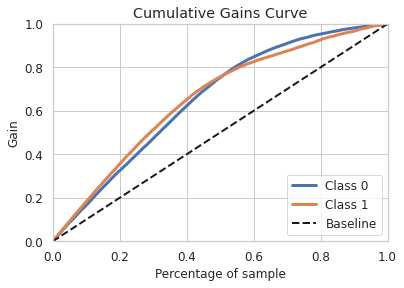

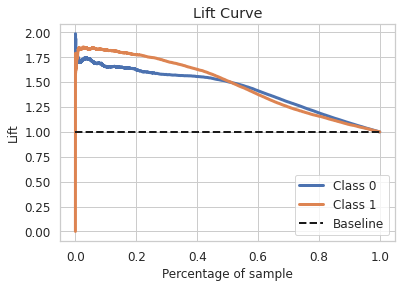

In [48]:
# Cumulative Gains Curve.
pred = lr.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

# Lift Curve.
skplt.metrics.plot_lift_curve(y_test, pred)
plt.show()

## `Gaussian Naive Bayes`

In [49]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
gnb.score(X_train, y_train)

0.7256

In [51]:
gnb.score(X_test, y_test)

0.72575

## `K-Nearest Neighbors`

### Find the best k-value

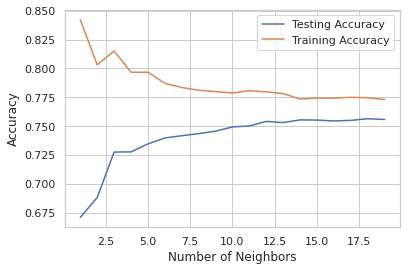

In [52]:
# Setup arrays to store train and test accuracies.
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [54]:
knn.score(X_train, y_train)

0.7743

In [55]:
knn.score(X_test, y_test)

0.755225

In [56]:
# Auc Score.
y_pred_proba = knn.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.8207430643272926

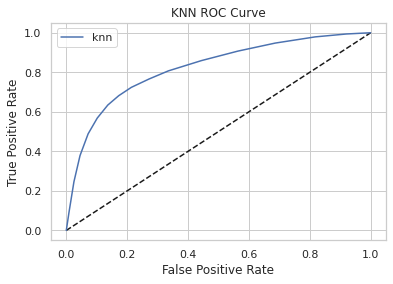

In [57]:
# Roc-Auc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='knn')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('KNN ROC Curve')
plt.legend()
plt.show()

In [58]:
y_pred = knn.predict(X_test)

In [59]:
# Confusion Metrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[15833  4305]
 [ 5486 14376]]


In [60]:
# Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     20138
           1       0.77      0.72      0.75     19862

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.75     40000
weighted avg       0.76      0.76      0.75     40000



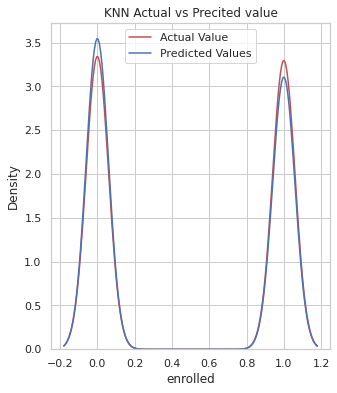

In [61]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('KNN Actual vs Precited value')
plt.legend()
plt.show()

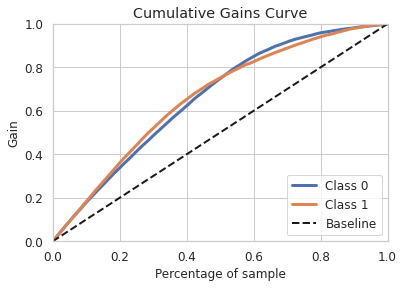

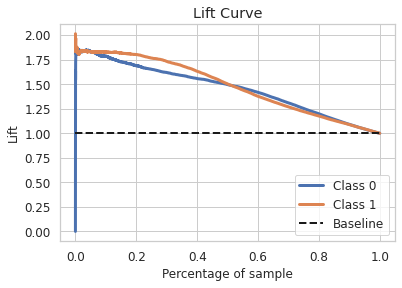

In [62]:
# Cumulative Gains Curve.
pred = knn.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

# Lift Curve.
skplt.metrics.plot_lift_curve(y_test, pred)
plt.show()

## `Support Vector Machine`

In [63]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [64]:
svm.score(X_train, y_train)

0.717

In [65]:
svm.score(X_test, y_test)

0.72325

In [66]:
# Auc Score.
y_pred_proba = svm.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.7959228351361809

## `XGBoost`

In [67]:
xg = XGBClassifier(objective='binary:logistic', 
                        n_estimators=400, alpha=0.05,
                        learning_rate=0.1, max_depth=5)
xg.fit(X_train, y_train)

XGBClassifier(alpha=0.05, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.0500000007, ...)

In [68]:
xg.score(X_train, y_train)

0.7988

In [69]:
xg.score(X_test, y_test)

0.7641

In [70]:
# Auc Score.
y_pred_proba = xg.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.8290921655780032

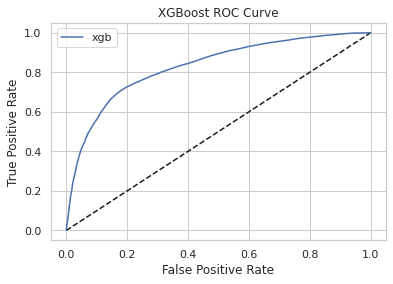

In [71]:
# Roc-Auc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='xgb')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

In [72]:
y_pred = xg.predict(X_test)

In [73]:
# Confusion Metrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[16214  3924]
 [ 5512 14350]]


In [74]:
# Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.77     20138
           1       0.79      0.72      0.75     19862

    accuracy                           0.76     40000
   macro avg       0.77      0.76      0.76     40000
weighted avg       0.77      0.76      0.76     40000



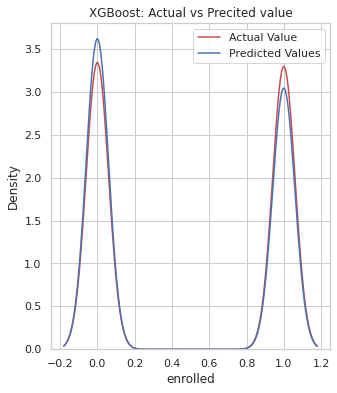

In [75]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('XGBoost: Actual vs Precited value')
plt.legend()
plt.show()

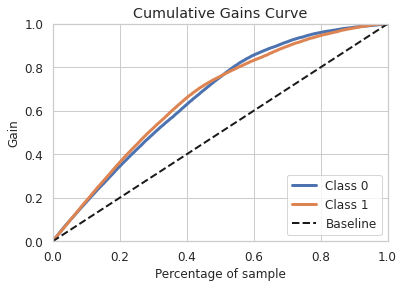

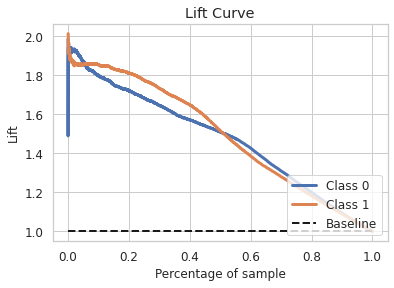

In [76]:
# Cumulative Gains Curve.
pred = xg.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

# Lift Curve.
skplt.metrics.plot_lift_curve(y_test, pred)
plt.show()

## `Ada Boost`

In [77]:
dt = DecisionTreeClassifier(max_depth=1, random_state=12)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=400)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=12),
                   n_estimators=400)

In [78]:
ada.score(X_train, y_train)

0.754

In [79]:
ada.score(X_test, y_test)

0.7561

In [80]:
# Auc Score.
y_pred_proba = ada.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.814529538501328

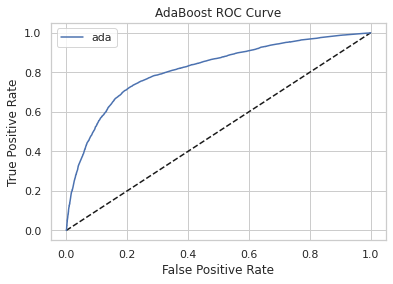

In [81]:
# Roc-Auc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='ada')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('AdaBoost ROC Curve')
plt.legend()
plt.show()

In [82]:
y_pred = ada.predict(X_test)

In [83]:
# Confusion Metrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[15464  4674]
 [ 5082 14780]]


In [84]:
# Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     20138
           1       0.76      0.74      0.75     19862

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



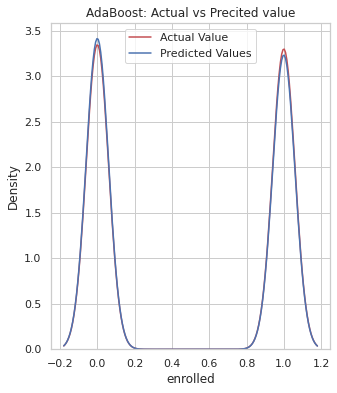

In [85]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('AdaBoost: Actual vs Precited value')
plt.legend()
plt.show()

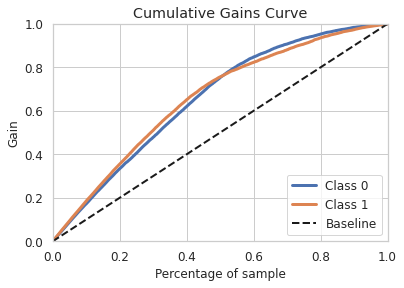

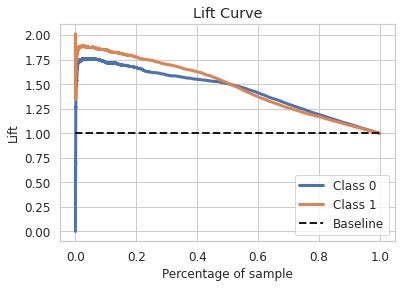

In [86]:
# Cumulative Gains Curve.
pred = ada.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

# Lift Curve.
skplt.metrics.plot_lift_curve(y_test, pred)
plt.show()

## `Voting Classifier`

In [87]:
svm = SVC(kernel='linear', probability=True)
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [('Support Vector Machine', svm),
               ('K Nearest Neighbors', knn),
               ('Random Forest Tree', rf)]

vc = VotingClassifier(estimators=classifiers, voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Support Vector Machine',
                              SVC(kernel='linear', probability=True)),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Random Forest Tree', RandomForestClassifier())],
                 voting='soft')

In [88]:
vc.score(X_test, y_test)

0.7501

In [89]:
# Auc Score.
y_pred_proba = vc.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.8099523780827205

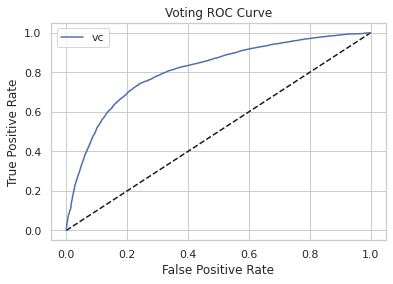

In [90]:
# Roc-Auc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='vc')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Voting ROC Curve')
plt.legend()
plt.show()

In [91]:
y_pred = vc.predict(X_test)

In [92]:
# Confusion Metrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[15433  4705]
 [ 5291 14571]]


In [93]:
# Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     20138
           1       0.76      0.73      0.74     19862

    accuracy                           0.75     40000
   macro avg       0.75      0.75      0.75     40000
weighted avg       0.75      0.75      0.75     40000



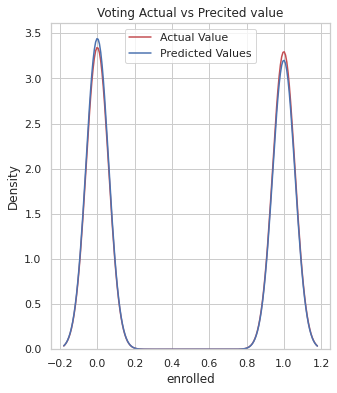

In [94]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('Voting Actual vs Precited value')
plt.legend()
plt.show()

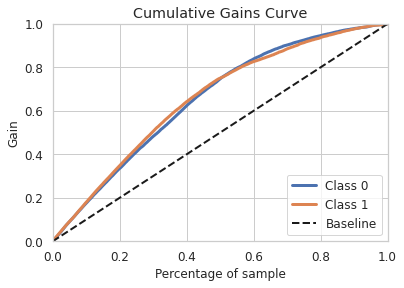

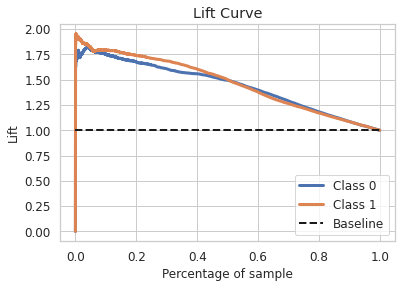

In [95]:
# Cumulative Gains Curve.
pred = vc.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

# Lift Curve.
skplt.metrics.plot_lift_curve(y_test, pred)
plt.show()

## `Decision Tree Cross-validation`

In [96]:
grid = {'max_depth': [3, 4, 5, 6],
        'min_samples_leaf': [0.04, 0.06, 0.08],
        'max_features': [0.2, 0.4, 0.6, 0.8]}

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, grid, scoring='accuracy', cv=5, n_jobs=-1)
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [97]:
dt_cv.score(X_train, y_train)

0.7364

In [98]:
dt_cv.score(X_test, y_test)

0.73765

In [99]:
# Auc Score.
y_pred_proba = dt_cv.predict_proba(X_test)[: ,1]
roc_auc_score(y_test, y_pred_proba)

0.8028175233922887

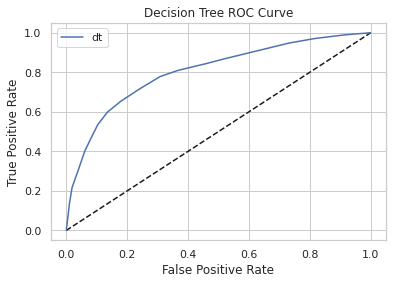

In [100]:
# Roc-Auc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='dt')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

In [101]:
y_pred = dt_cv.predict(X_test)

In [102]:
# Confusion Metrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[15296  4842]
 [ 5652 14210]]


In [103]:
# Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     20138
           1       0.75      0.72      0.73     19862

    accuracy                           0.74     40000
   macro avg       0.74      0.74      0.74     40000
weighted avg       0.74      0.74      0.74     40000



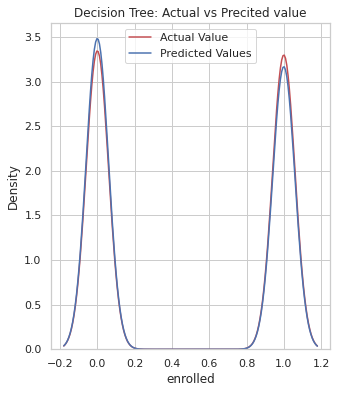

In [104]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('Decision Tree: Actual vs Precited value')
plt.legend()
plt.show()

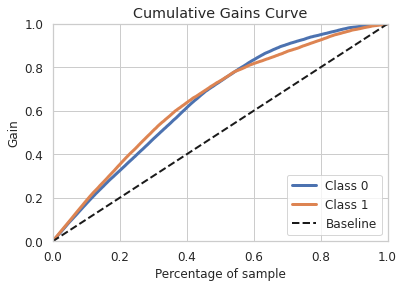

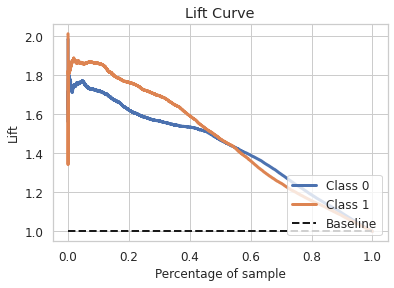

In [105]:
# Cumulative Gains Curve.
pred = dt_cv.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

# Lift Curve.
skplt.metrics.plot_lift_curve(y_test, pred)
plt.show()

## `Logistic Regression Cross-validation`

In [106]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# create model
model = LogisticRegression()

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.747 (0.010)
